In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
transactions = pd.read_csv('C:\\Users\\lohit\\OneDrive\\Desktop\\1\\data\\cleaned_transactions.csv')

# Convert transaction_date to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['InvoiceDate'], dayfirst=True, errors='coerce')

transactions



C:\Users\lohit\AppData\Local\Temp\ipykernel_14148\2412299713.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  transactions = pd.read_csv('C:\\Users\\lohit\\OneDrive\\Desktop\\1\\data\\cleaned_transactions.csv')


,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate,TransactionDate,Description,Country
0,489434,85048,12,6.95,13085.0,01 December 2021,2021-12-01,15CM CHRISTMAS GLASS BALL 20 LIGHTS,United Kingdom
1,489434,79323P,12,6.75,13085.0,01 December 2021,2021-12-01,PINK CHERRY LIGHTS,United Kingdom
2,489434,79323P,12,6.75,13085.0,01 December 2021,2021-12-01,"Unsaleable, destroyed.",United Kingdom
3,489434,79323P,12,6.75,13085.0,01 December 2021,2021-12-01,NaN,United Kingdom
4,489434,79323W,12,6.75,13085.0,01 December 2021,2021-12-01,WHITE CHERRY LIGHTS,United Kingdom
...,...,...,...,...,...,...,...,...,...
2115554,581587,22138,3,4.95,12680.0,09-12-2023,2023-12-09,mouldy,NaN
2115555,581587,22138,3,4.95,12680.0,09-12-2023,2023-12-09,damages,NaN
2115556,581587,22138,3,4.95,12680.0,09-12-2023,2023-12-09,NaN,NaN
2115557,581587,POST,1,18.00,12680.0,09-12-2023,2023-12-09,POSTAGE,NaN


StockCode
85123A    480330
85099B    382956
22197     317452
23084     245168
84879     242115
22423     206112
21181     201136
21212     190900
20713     168669
21915     148564
Name: Quantity, dtype: int64


C:\Users\lohit\AppData\Local\Temp\ipykernel_14148\3303509230.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_selling.index, y=top_10_selling.values, palette='viridis')


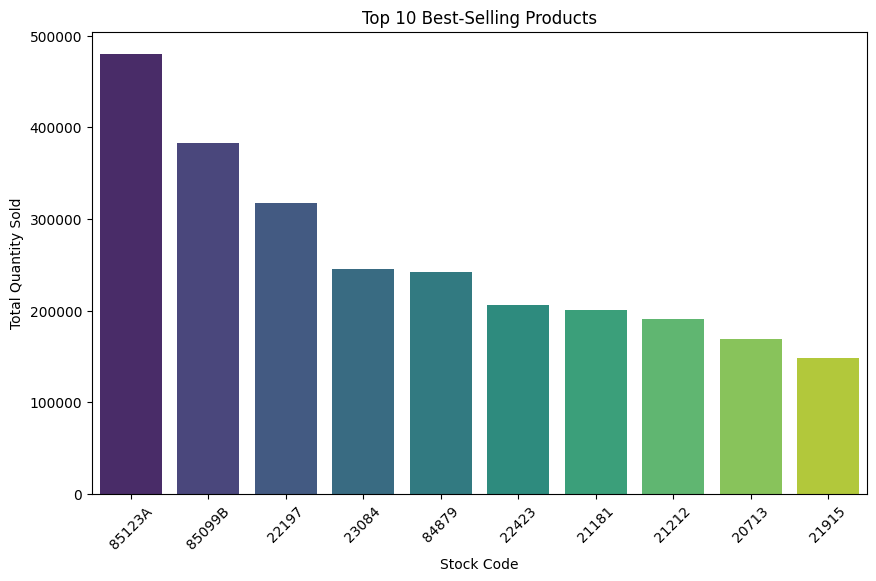

In [6]:
top_10_selling = transactions.groupby('StockCode')['Quantity'].sum().nlargest(10)
print(top_10_selling)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_selling.index, y=top_10_selling.values, palette='viridis')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Stock Code')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()


StockCode
22423     2622509.20
85123A    1268600.10
85099B     725114.04
DOT        645294.94
23084      534052.72
47566      443845.50
21181      406239.36
84879      394241.55
20713      368469.99
22502      366445.50
Name: revenue, dtype: float64


C:\Users\lohit\AppData\Local\Temp\ipykernel_14148\3979660392.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_revenue.index, y=top_10_revenue.values, palette='magma')


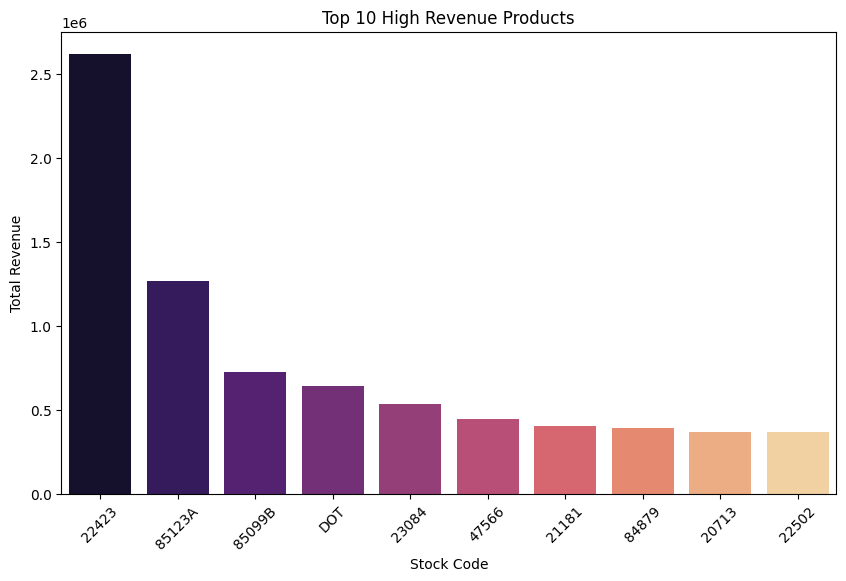

In [7]:
# Calculate revenue
transactions['revenue'] = transactions['Price'] * transactions['Quantity']

top_10_revenue = transactions.groupby('StockCode')['revenue'].sum().nlargest(10)
print(top_10_revenue)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_revenue.index, y=top_10_revenue.values, palette='magma')
plt.title('Top 10 High Revenue Products')
plt.xlabel('Stock Code')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


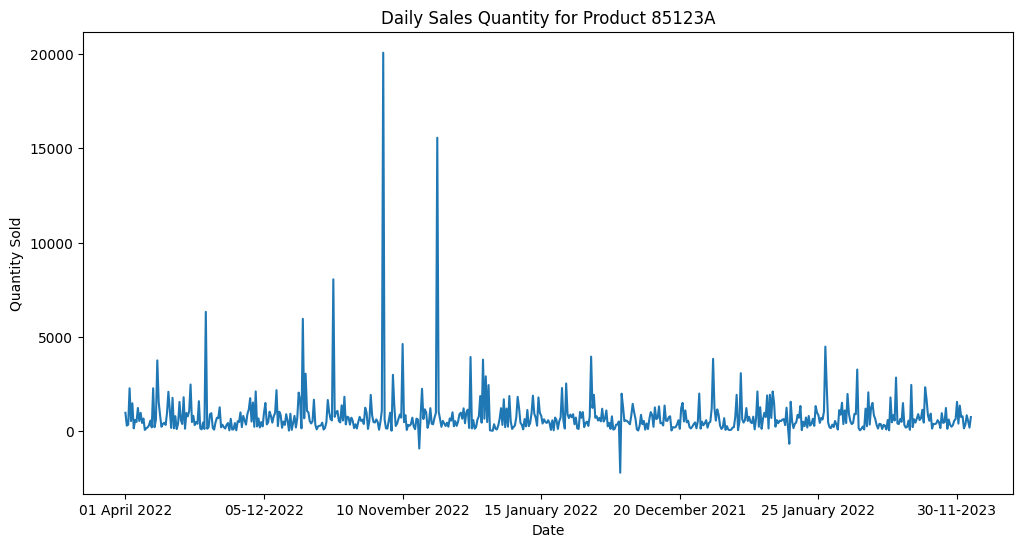

In [8]:
# Select a product code from top 10
product_code = top_10_selling.index[0]  # For example, take the top-selling product

product_sales = transactions[transactions['StockCode'] == product_code]
daily_sales = product_sales.groupby('InvoiceDate')['Quantity'].sum()

plt.figure(figsize=(12,6))
daily_sales.plot()
plt.title(f'Daily Sales Quantity for Product {product_code}')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.show()


<Figure size 1200x500 with 0 Axes>

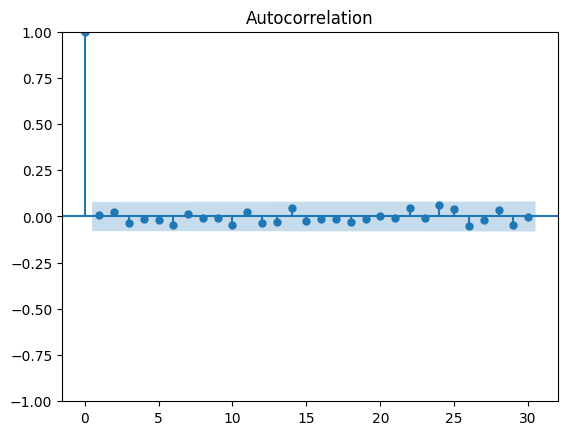

<Figure size 1200x500 with 0 Axes>

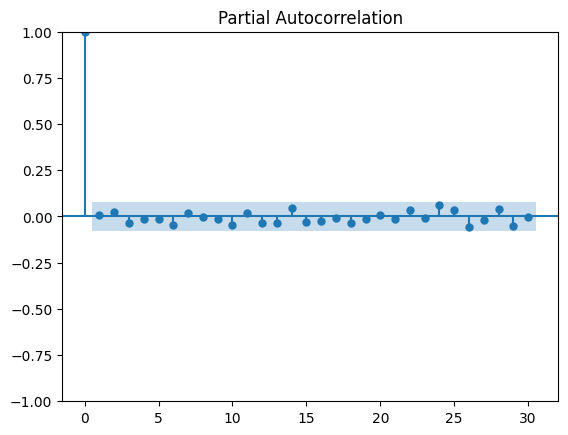

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,5))
plot_acf(daily_sales, lags=30)
plt.show()

plt.figure(figsize=(12,5))
plot_pacf(daily_sales, lags=30)
plt.show()
